In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
    
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from IPython.display import display

### Homework

>Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution. If it's exactly in between two options, select the higher value.

**Dataset**

In this homework, we continue using the fuel efficiency dataset. Download it from here.

You can do it with wget:

`wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv`

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [3]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

### Preparing the dataset

**Preparation:**

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the `train_test_split` function and set the `random_state` parameter to `1`.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


**Fill missing values with zeros.**

In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [8]:
df[numerical_cols] = df[numerical_cols].fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

**Do train/validation/test split with 60%/20%/20% distribution. Use the `train_test_split` function and set the `random_state` parameter to `1`.**

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = (df_train.fuel_efficiency_mpg).astype('float64').values
y_val = (df_val.fuel_efficiency_mpg).astype('float64').values
y_test = (df_test.fuel_efficiency_mpg).astype('float64').values

In [12]:
y_test.shape

(1941,)

In [13]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

**Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.**

In [14]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Question 1

Let's train a decision tree regressor to predict the `fuel_efficiency_mpg` variable.

* Train a model with `max_depth=1`.

Which feature is used for splitting the data?

* `'vehicle_weight'`.  <--
* `'model_year'`
* `'origin'`
* `'fuel_type'`

In [17]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



### Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)

What's the `RMSE` of this model on the validation data?

* `0.045`
* `0.45`. <-- closest
* `4.5`
* `45.0`

In [21]:
dt = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
dt.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = dt.predict(X_val)
mean_squared_error(y_val, y_pred)

0.21121168284297887

### Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from `10` to `200` with step `10`.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.

After which value of `n_estimators` does `RMSE` stop improving? Consider 3 decimal places for calculating the answer.

* 10
* 25
* 80
* 200  <--- actuall is 180

If it doesn't stop improving, use the latest iteration number in your answer.



In [27]:
for n in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    print(f'n= {n} rmse= {rmse}')

n= 10 rmse= 0.21121168284297887
n= 20 rmse= 0.2057444981903153
n= 30 rmse= 0.20402089822288527
n= 40 rmse= 0.20135038343177425
n= 50 rmse= 0.19950238385350164
n= 60 rmse= 0.19843434664770768
n= 70 rmse= 0.19813744476172163
n= 80 rmse= 0.19801103790629235
n= 90 rmse= 0.19790174585443168
n= 100 rmse= 0.19771528379308473
n= 110 rmse= 0.19676212022539075
n= 120 rmse= 0.1970577466607906
n= 130 rmse= 0.19687198872473022
n= 140 rmse= 0.1965636520438218
n= 150 rmse= 0.19615829732148443
n= 160 rmse= 0.1960374996767634
n= 170 rmse= 0.19607313744804325
n= 180 rmse= 0.19568409796663266
n= 190 rmse= 0.19580091447937858


### Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
    * try different values of `n_estimators` from `10` till `200` (with step `10`)
    * calculate the mean `RMSE`
Fix the random seed: `random_state=1`

What's the best `max_depth`, using the mean `RMSE`?

* `10`  <---
* `15`
* `20`
* `25`

In [30]:
for n in range(10, 200, 10):
    for d in [10, 15, 20, 25]:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred)
        print(f'n= {n} d= {d} rmse= {round(rmse, 3)}')

n= 10 d= 10 rmse= 0.203
n= 10 d= 15 rmse= 0.209
n= 10 d= 20 rmse= 0.21
n= 10 d= 25 rmse= 0.211
n= 20 d= 10 rmse= 0.2
n= 20 d= 15 rmse= 0.205
n= 20 d= 20 rmse= 0.206
n= 20 d= 25 rmse= 0.206
n= 30 d= 10 rmse= 0.198
n= 30 d= 15 rmse= 0.203
n= 30 d= 20 rmse= 0.204
n= 30 d= 25 rmse= 0.204
n= 40 d= 10 rmse= 0.196
n= 40 d= 15 rmse= 0.201
n= 40 d= 20 rmse= 0.202
n= 40 d= 25 rmse= 0.202
n= 50 d= 10 rmse= 0.195
n= 50 d= 15 rmse= 0.199
n= 50 d= 20 rmse= 0.2
n= 50 d= 25 rmse= 0.2
n= 60 d= 10 rmse= 0.195
n= 60 d= 15 rmse= 0.198
n= 60 d= 20 rmse= 0.199
n= 60 d= 25 rmse= 0.199
n= 70 d= 10 rmse= 0.195
n= 70 d= 15 rmse= 0.198
n= 70 d= 20 rmse= 0.198
n= 70 d= 25 rmse= 0.198
n= 80 d= 10 rmse= 0.195
n= 80 d= 15 rmse= 0.198
n= 80 d= 20 rmse= 0.199
n= 80 d= 25 rmse= 0.198
n= 90 d= 10 rmse= 0.195
n= 90 d= 15 rmse= 0.198
n= 90 d= 20 rmse= 0.199
n= 90 d= 25 rmse= 0.198
n= 100 d= 10 rmse= 0.195
n= 100 d= 15 rmse= 0.197
n= 100 d= 20 rmse= 0.198
n= 100 d= 25 rmse= 0.198
n= 110 d= 10 rmse= 0.194
n= 110 d= 15 rmse=

### We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

What's the most important feature (among these 4)?

* `vehicle_weight`. <---
* `horsepower`
* `acceleration`
* `engine_displacement`

In [31]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
rf.feature_importances_

array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [33]:
# 1. Get the feature names from your DictVectorizer
feature_names = dv.get_feature_names_out()

# 2. Get the importances from the model
importances = rf.feature_importances_

# 3. Create a pandas Series to view them clearly
df_importances = pd.Series(importances, index=feature_names)

# 4. Sort the series to see the most important features at the top
df_importances_sorted = df_importances.sort_values(ascending=False)

print(df_importances_sorted)

vehicle_weight                  0.959150
horsepower                      0.015998
acceleration                    0.011480
engine_displacement             0.003273
model_year                      0.003212
num_cylinders                   0.002343
num_doors                       0.001635
origin=USA                      0.000540
origin=Europe                   0.000519
origin=Asia                     0.000462
fuel_type=Gasoline              0.000360
drivetrain=All-wheel drive      0.000357
drivetrain=Front-wheel drive    0.000345
fuel_type=Diesel                0.000325
dtype: float64


### Question 6

Now let's train an `XGBoost` model! For this question, we'll tune the eta parameter:

* Install `XGBoost`
* Create `DMatrix` for train and validation
* Create a `watchlist`
* Train a model with these parameters for 100 rounds:

```Python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```
Now change `eta` from `0.3` to `0.1`.

Which `eta` leads to the best `RMSE` score on the validation dataset?

* `0.3`
* `0.1`  <--
* Both give equal value


In [34]:
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [36]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [42]:
%%capture output 
eval_results = {}

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, 
                  evals=watchlist,
                  evals_result=eval_results)

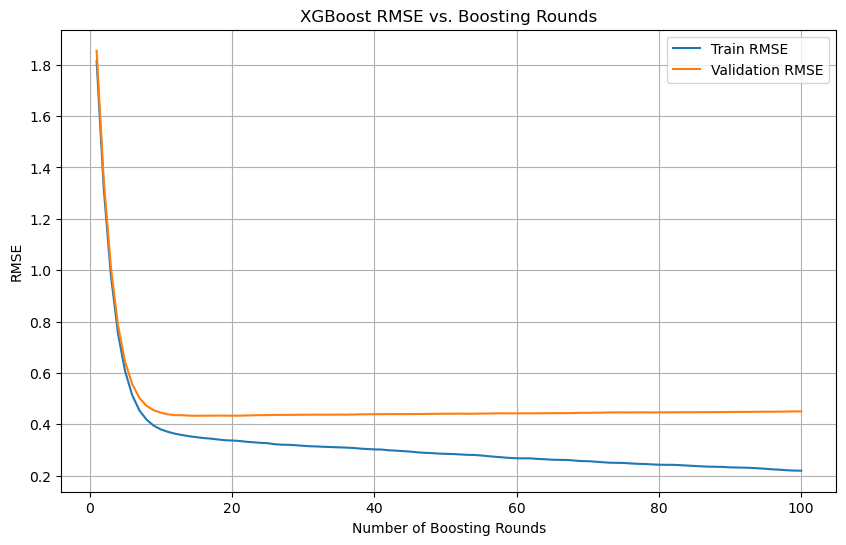

In [ ]:
# 1. Get the list of validation scores from the results dictionary
val_rmse_scores = eval_results['val']['rmse']
train_rmse_scores = eval_results['train']['rmse']

# 2. Get the number of rounds (e.g., 100)
rounds = range(1, len(val_rmse_scores) + 1)

# 3. Create the plot
# We set a good figure size
plt.figure(figsize=(10, 6))

# Plot training & validation errors
plt.plot(rounds, train_rmse_scores, label='Train RMSE')
plt.plot(rounds, val_rmse_scores, label='Validation RMSE')

# 4. Add labels and a title
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE vs. Boosting Rounds')
plt.legend()
plt.grid(True)

In [44]:
# Find and print the best round
best_round = np.argmin(val_rmse_scores) + 1 # +1 because list is 0-indexed
best_rmse = val_rmse_scores[best_round - 1]
print(f"Best round: {best_round}")
print(f"Best validation RMSE: {best_rmse}")

Best round: 15
Best validation RMSE: 0.4334861295405598


**eta=0.1**

In [45]:
%%capture output 
eval_results = {}

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, 
                  evals=watchlist,
                  evals_result=eval_results)

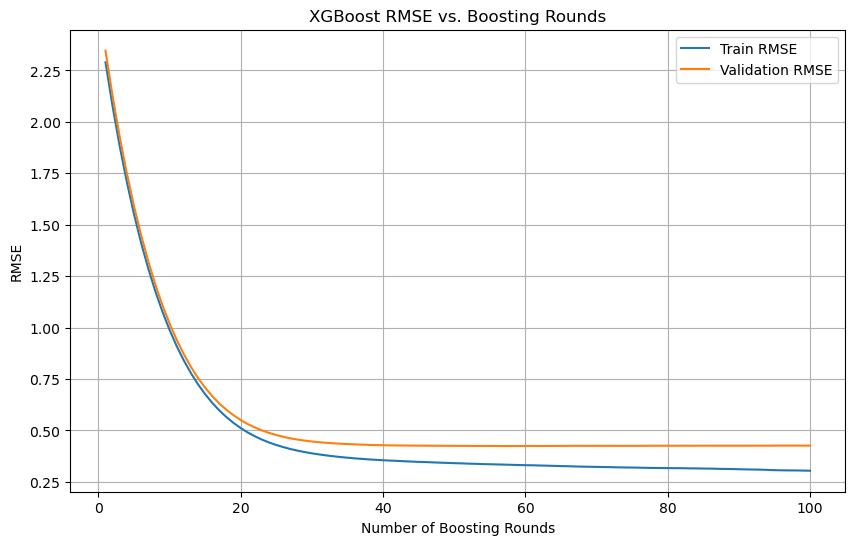

In [46]:
# 1. Get the list of validation scores from the results dictionary
val_rmse_scores = eval_results['val']['rmse']
train_rmse_scores = eval_results['train']['rmse']

# 2. Get the number of rounds (e.g., 100)
rounds = range(1, len(val_rmse_scores) + 1)

# 3. Create the plot
# We set a good figure size
plt.figure(figsize=(10, 6))

# Plot training & validation errors
plt.plot(rounds, train_rmse_scores, label='Train RMSE')
plt.plot(rounds, val_rmse_scores, label='Validation RMSE')

# 4. Add labels and a title
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE vs. Boosting Rounds')
plt.legend()
plt.grid(True)

In [47]:
# Find and print the best round
best_round = np.argmin(val_rmse_scores) + 1 # +1 because list is 0-indexed
best_rmse = val_rmse_scores[best_round - 1]
print(f"Best round: {best_round}")
print(f"Best validation RMSE: {best_rmse}")

Best round: 57
Best validation RMSE: 0.4242625629140815
